In [25]:
# make sure you have pandas 1.5 installed, if not run this command in your terminal
# pip install --upgrade pandas==1.5.2

# we also need lxml, matplotlib, and plottable
# pip install lxml matplotlib plottable

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [11]:
# Use pandas to read in the data
df = pd.read_html('https://fbref.com/en/comps/12/La-Liga-Stats', attrs={'id': "results2023-2024121_overall"})[0]

In [12]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Girona,13,11,1,1,31,16,15,34,2.62,25.0,16.8,8.2,0.63,W W W W W,12442,Artem Dovbyk - 7,Paulo Gazzaniga,NaN
1,2,Real Madrid,13,10,2,1,28,9,19,32,2.46,24.0,14.0,10.0,0.77,W D W D W,69236,Jude Bellingham - 10,Kepa Arrizabalaga,NaN
2,3,Barcelona,13,9,3,1,26,13,13,30,2.31,26.8,13.5,13.3,1.02,D W L W W,42219,Robert Lewandowski - 7,Marc-André ter Stegen,NaN
3,4,Atlético Madrid,12,9,1,2,29,12,17,28,2.33,22.8,10.2,12.7,1.05,W W W L W,58486,Antoine Griezmann - 8,Jan Oblak,NaN
4,5,Athletic Club,13,7,3,3,25,17,8,24,1.85,23.6,14.8,8.8,0.67,W L D W W,44845,Gorka Guruzeta - 6,Unai Simón,NaN


In [18]:
# Read in the images
df['badge'] = df['Squad'].apply(
    lambda x: f"/Users/mckayjohns/Documents/GitHub/youtube-videos/team_logos/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}_logo.png"
)

In [19]:
# Some data cleaning
df[['xG', 'xGA', 'xGD', 'xGD/90']] = df[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

df = df[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [20]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [21]:
# Create ColumnDefinitions for the table
# I'll show you how to do 3 things the columns
# 1. load images
# 2. add color
# 3. add columns to groups
col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]


/var/folders/l3/wlgnl3zd5hl46kfjq1yh3k9r0000gn/T/ipykernel_22898/3319568248.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


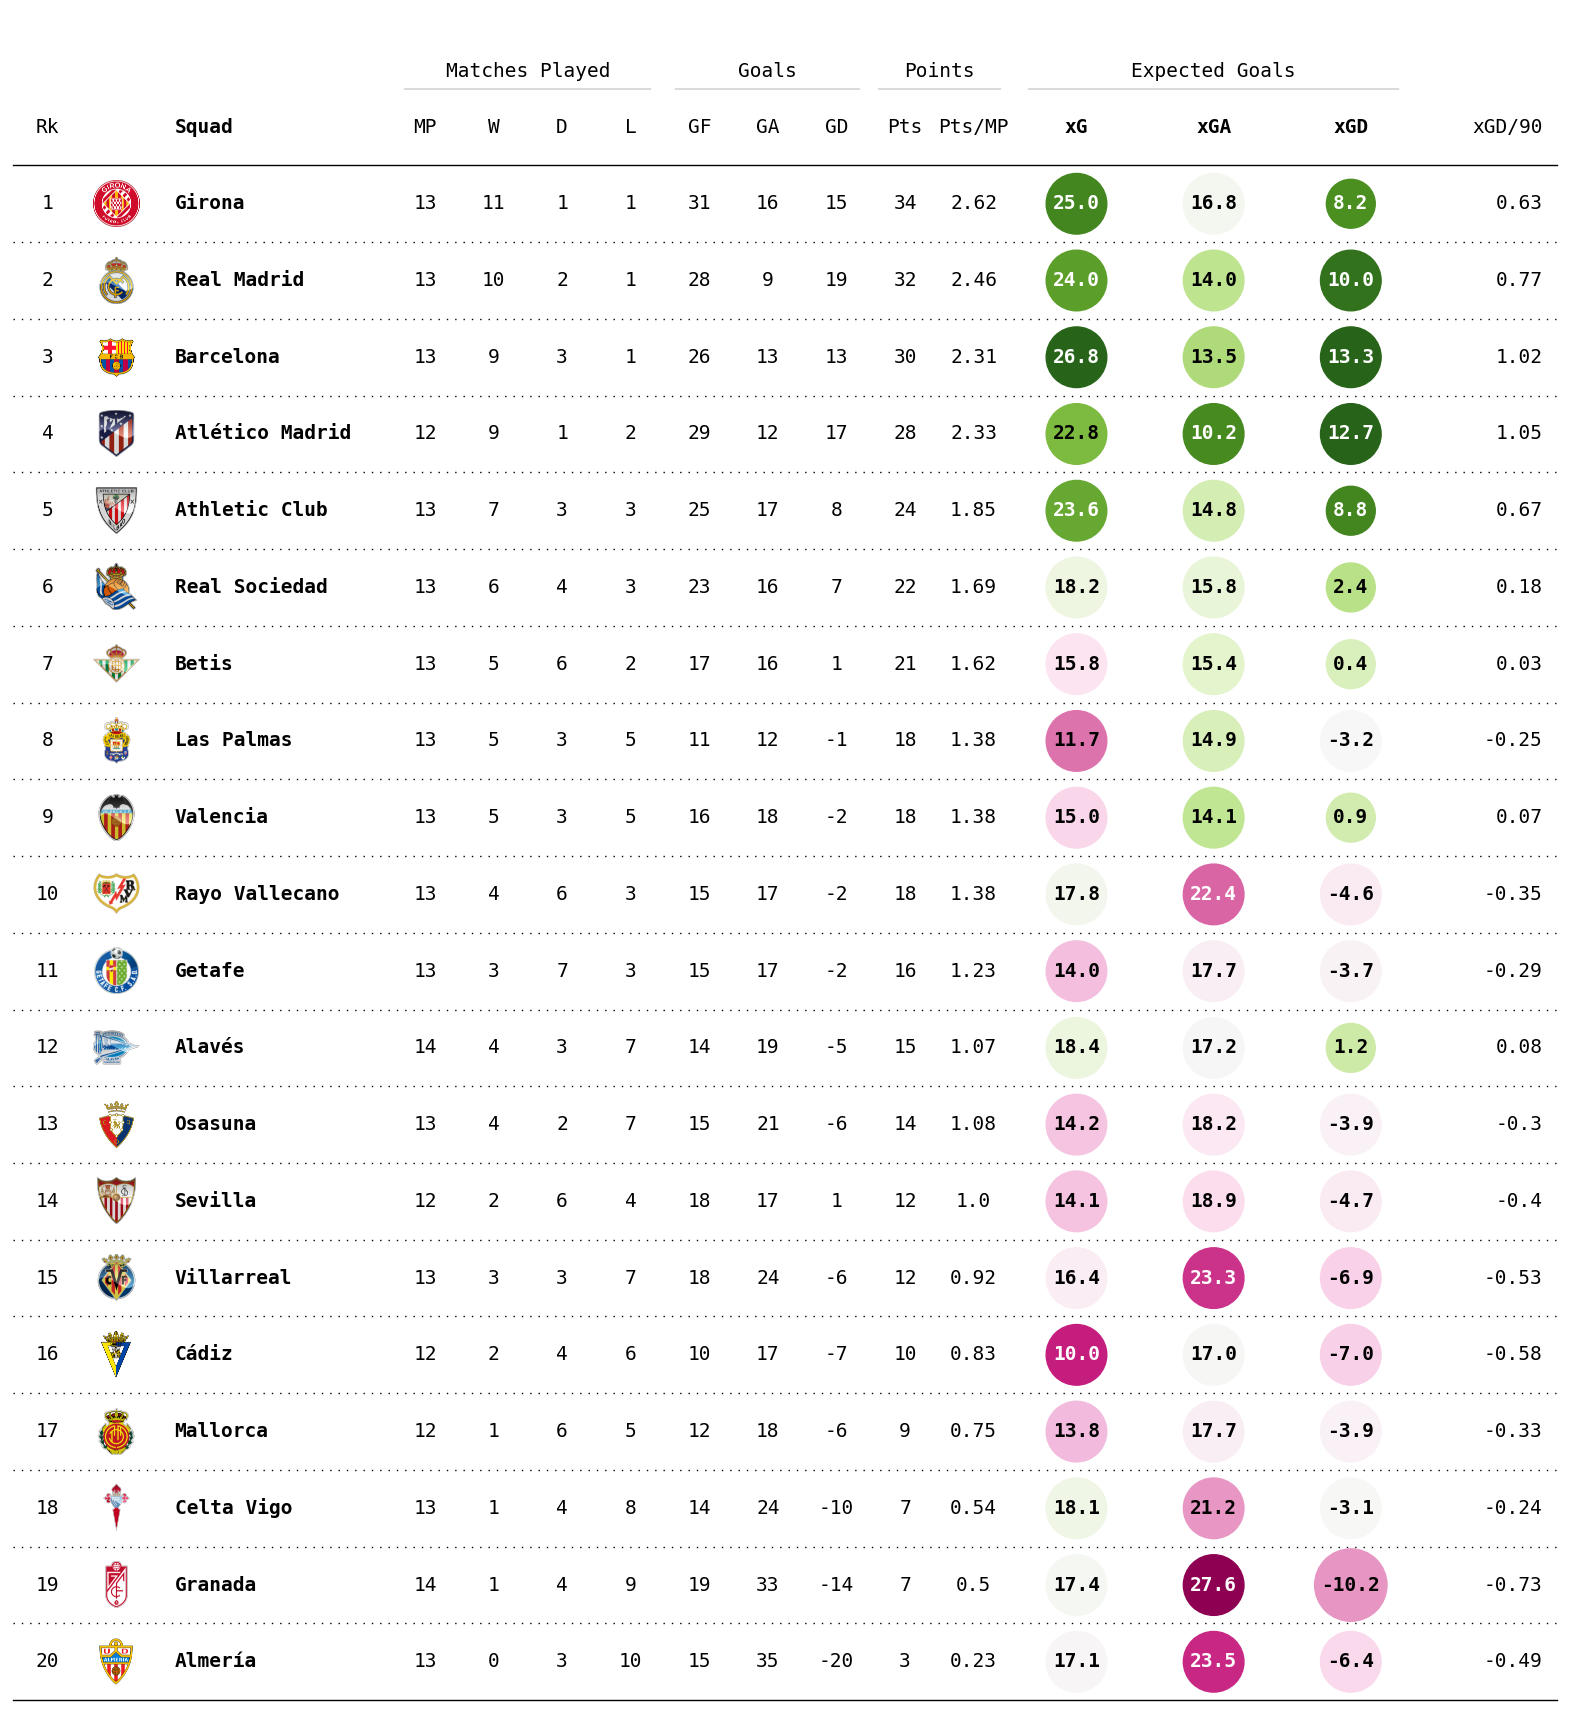

In [40]:
# Ok lets actually create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"
# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

# for idx in [0, 1, 2, 3]:
#     table.rows[idx].set_facecolor(row_colors["top4"])
#
# for idx in [4, 5]:
#     table.rows[idx].set_facecolor(row_colors["top6"])
#
#
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])




fig.show()

In [41]:
fig.savefig(
    "/Users/mckayjohns/Desktop/laliga_table.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)

In [37]:
table.cells[10, 3]

TextCell(xy=(2.75, 10), content=13, row_idx=10, col_idx=3)